# Monte Carlo Comparisons 
This is for compairing my code to Monte Carlo.

In [2]:
%pylab ipympl
import pickle
import imshow_slider as ims
from topas2numpy import BinnedResult
from coorform import coorform

Populating the interactive namespace from numpy and matplotlib


## Testing Dose One
This is a 120 keV monoenergetic pencil beam in an ellipse shape moving from positive to negative z in water. The medium is a 5cm x 5cm x 5cm block with 50 voxels in each axis.

In [186]:
# my_dose_array_corrected = pickle.load(open('dose_19.pickle','rb'))
my_dose_array = pickle.load(open('dose_42.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1/TestingDose1_1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [187]:
conversion = 1.602e-10

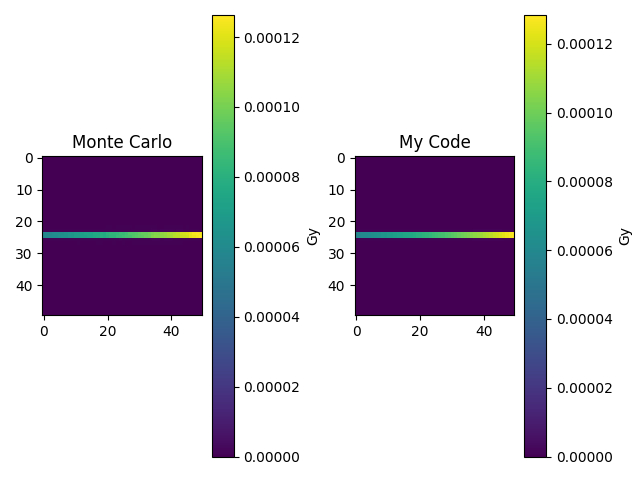

In [188]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


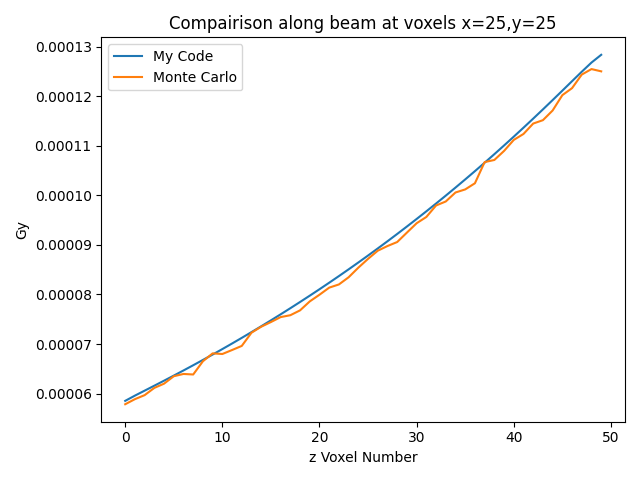

In [190]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[25][25],label='Monte Carlo')
# plot(pickle.load(open('dose_26.pickle','rb'))[25][25]*conversion,label='Uncorrected Centre')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

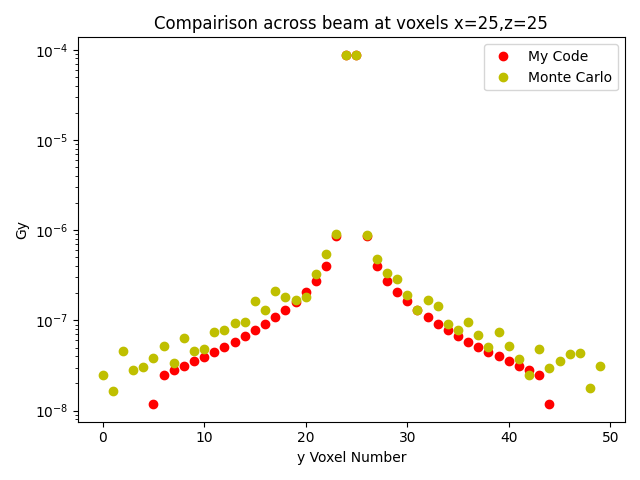

In [191]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code')
        # semilogy(n,pickle.load(open('dose_26.pickle','rb'))[25][n][25]*conversion,'go',label='My Code Uncorrected Centre')
        # semilogy(n,pickle.load(open('dose_21.pickle','rb'))[25][n][25]*conversion,'go',label='My Code \n (Kernel Interaction \n Size is 0.05cm)')
        # semilogy(n,pickle.load(open('dose_12.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Kernel Interaction \n Size is 0.1cm)')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Previous Incorrect \n Kernel Size)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        # semilogy(n,pickle.load(open('dose_26.pickle','rb'))[25][n][25]*conversion,'go')
        # semilogy(n,pickle.load(open('dose_21.pickle','rb'))[25][n][25]*conversion,'go')
        # semilogy(n,pickle.load(open('dose_12.pickle','rb'))[25][n][25]*conversion,'bo')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('y Voxel Number')
tight_layout()

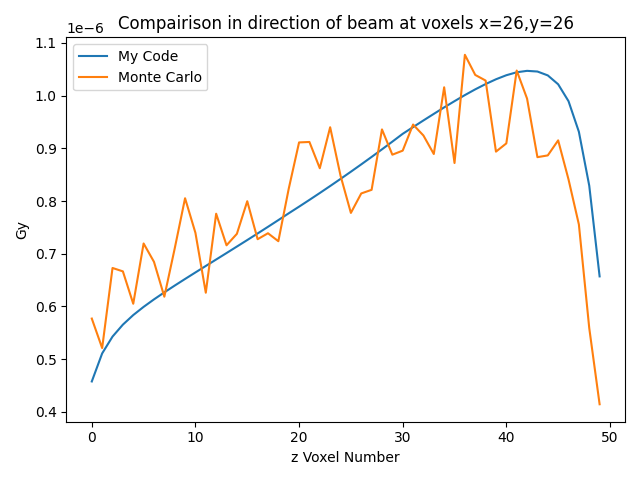

In [192]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[26][26]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

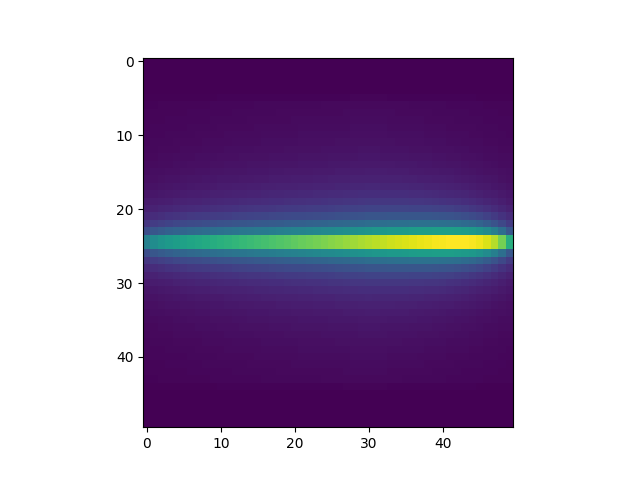

In [193]:
close(6);figure(6)
imshow(my_dose_array[26])

Text(0.5, 1.0, 'percent difference at x=26')

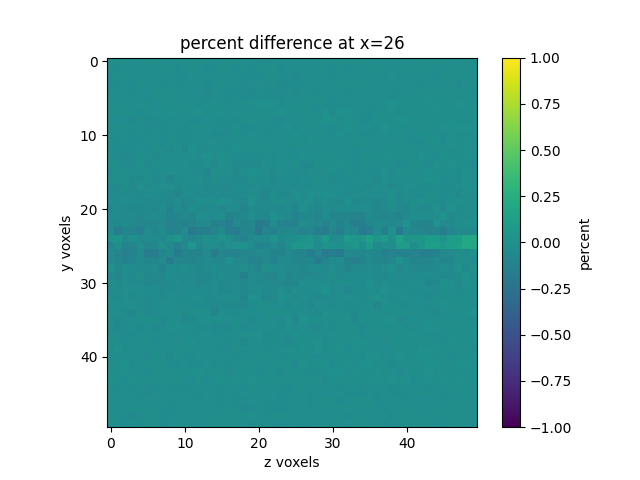

In [194]:
n=26
mini=-1
maxi=1

close(7);figure(7)
# imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.mean(array(np.mean(mc_dose_array[n]),np.mean(my_dose_array[n]*conversion))),vmin=mini,vmax=maxi)
imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.max([mc_dose_array,my_dose_array*conversion])*100,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(n))

# np.max([mc_dose_array[n],my_dose_array[n]*conversion])


In [195]:
values = np.mean(abs(my_dose_array[24][24]/np.max(my_dose_array[24][24])-mc_dose_array[24][24]/np.max(mc_dose_array[24][24]))),np.mean(abs(my_dose_array[24][25]/np.max(my_dose_array[24][25])-mc_dose_array[24][25]/np.max(mc_dose_array[24][25]))),np.mean(abs(my_dose_array[25][24]/np.max(my_dose_array[25][24])-mc_dose_array[25][24]/np.max(mc_dose_array[25][24]))),np.mean(abs(my_dose_array[25][25]/np.max(my_dose_array[25][25])-mc_dose_array[25][25]/np.max(mc_dose_array[25][25])))

mean(values) 

0.006408164129895238

## Testing Dose Two
Polyenergtic beam, but the rest of the specifications are the same as above.

In [16]:
my_dose_array = pickle.load(open('dosetest2_1.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose2.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [17]:
conversion = 1.602e-10

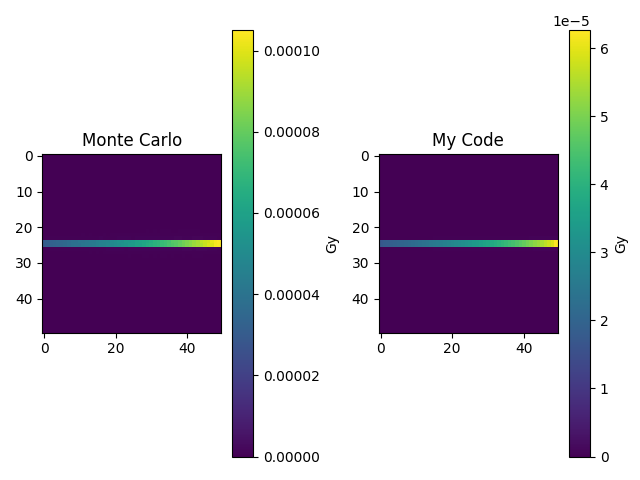

In [18]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()

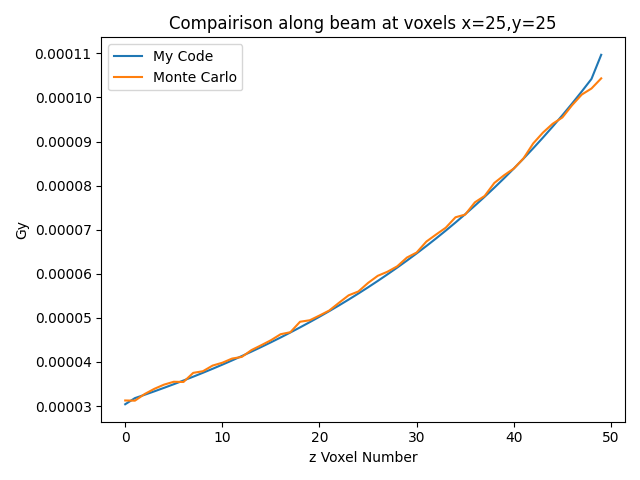

In [19]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion*1.75,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

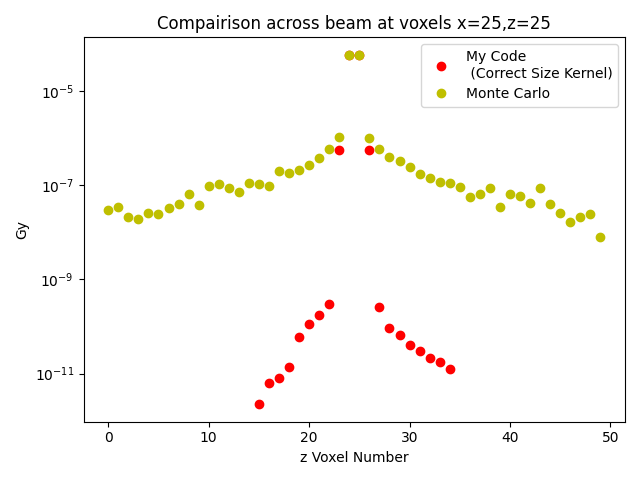

In [20]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion*1.75,'ro',label='My Code \n (Correct Size Kernel)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion*1.75,'ro')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

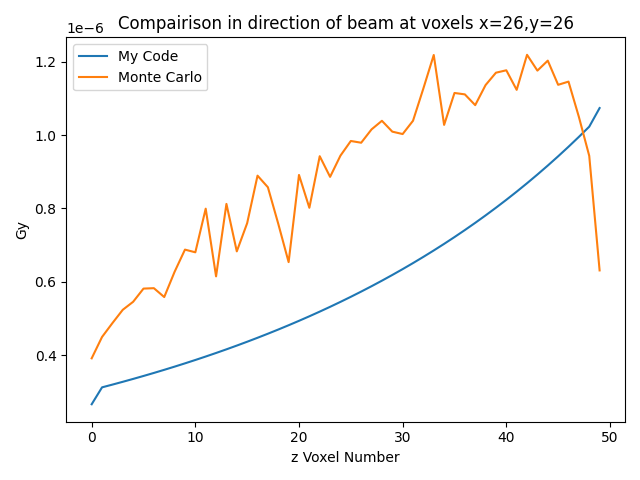

In [24]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion*1.75,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

## Testing Dose Three

In [42]:
my_dose_array = pickle.load(open('dose3_6.pickle','rb'))
mc_dose_array_water_full = BinnedResult('../Topas/TestingDose3_Water.csv')
mc_dose_array_water = mc_dose_array_water_full.data['Sum']
mc_dose_array_bone_full = BinnedResult('../Topas/TestingDose3_Bone.csv')
mc_dose_array_bone = mc_dose_array_bone_full.data['Sum']

mc_dose_array = []

for i in range(len(mc_dose_array_water)):
    mc_dose_array.append([])
    for j in range(len(mc_dose_array_water[0])):
        mc_dose_array[i].append(list(mc_dose_array_bone[i][j])+list(mc_dose_array_water[i][j]))

mc_dose_array = array(mc_dose_array)

In [43]:
conversion = 1.602e-10*0.0395

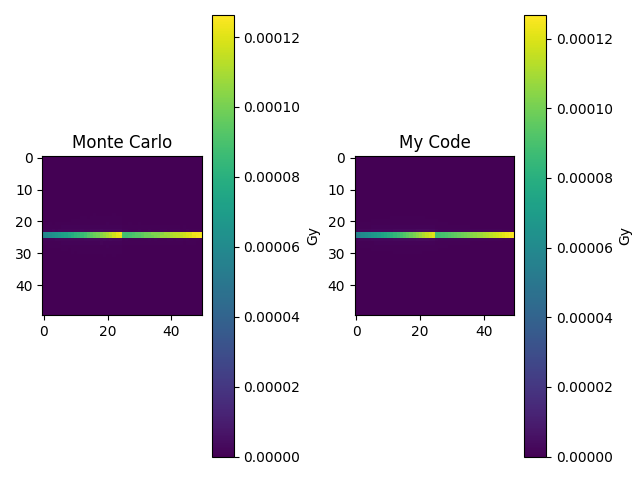

In [44]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


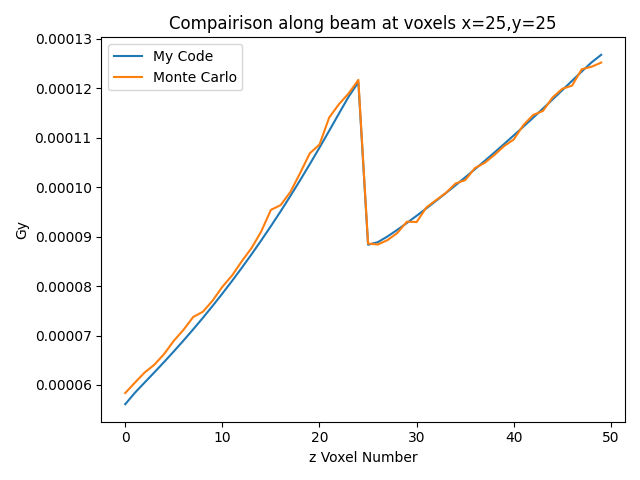

In [45]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

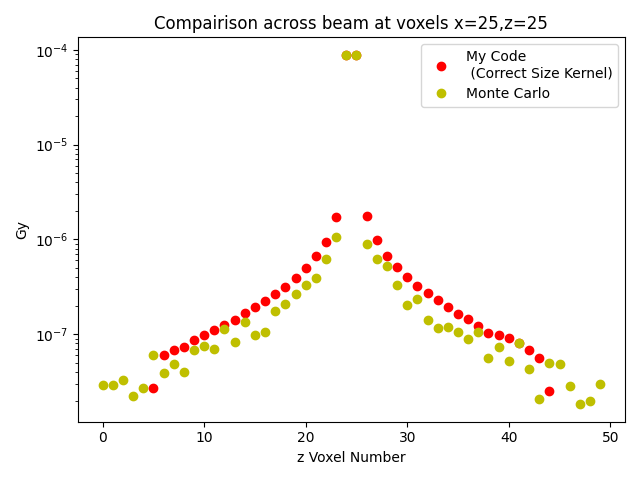

In [46]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code \n (Correct Size Kernel)')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Previous Incorrect \n Kernel Size)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

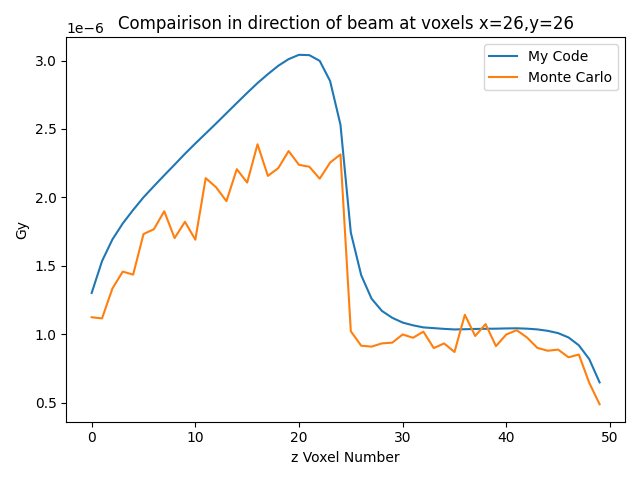

In [47]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

Text(0.5, 1.0, 'percent difference at x=25')

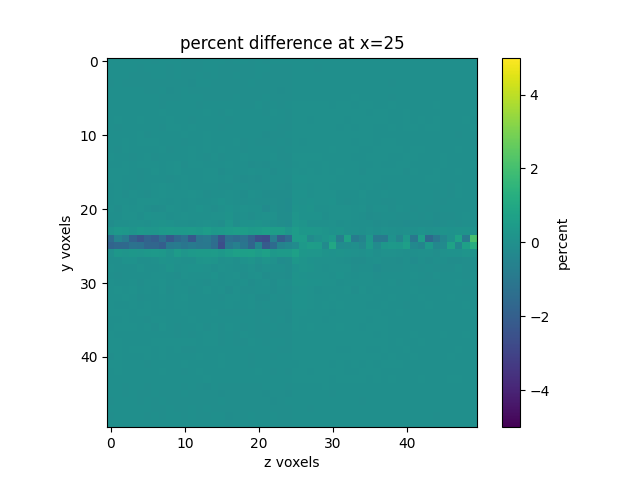

In [50]:
n=25
mini=-5
maxi=5

close(7);figure(7)
# imshow(100*(my_dose_array[n]*conversion-mc_dose_array[n])/np.mean(array(np.mean(mc_dose_array[n]),np.mean(my_dose_array[n]*conversion))),vmin=mini,vmax=maxi)
imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.max([mc_dose_array,my_dose_array*conversion])*100,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(n))

## Testing Dose Four
- 5cm x 5cm x 5cm block of water 
- Same parameters as Testing Dose 1
- Fan Beam with 30 degree angle in Y 

In [9]:
my_dose_array = pickle.load(open('dose4_27.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose4.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [21]:
conversion = 1.602e-10*0.04

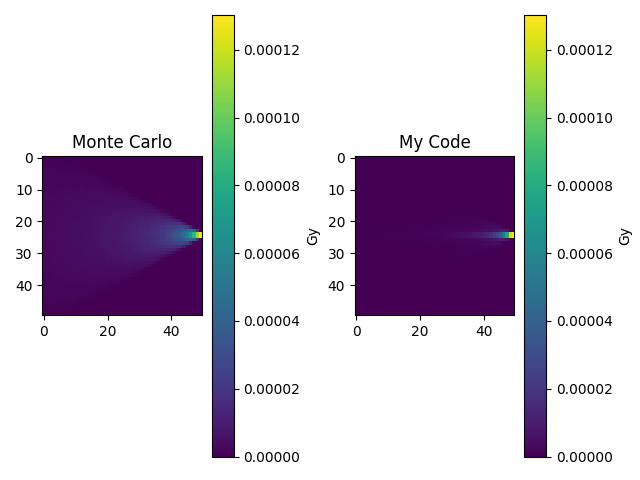

In [22]:
x = 25
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


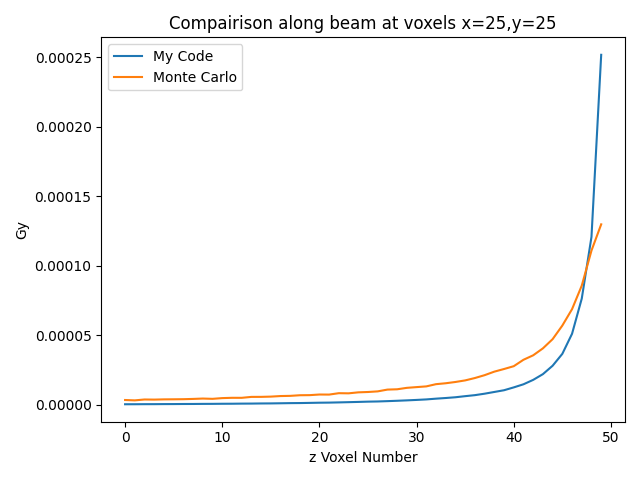

In [23]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

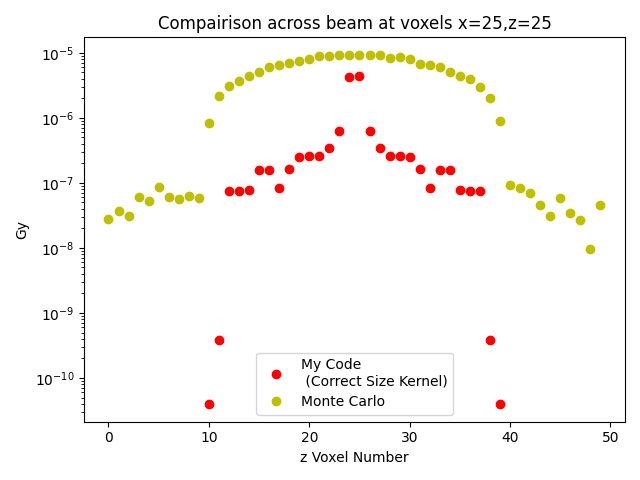

In [30]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code \n (Correct Size Kernel)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

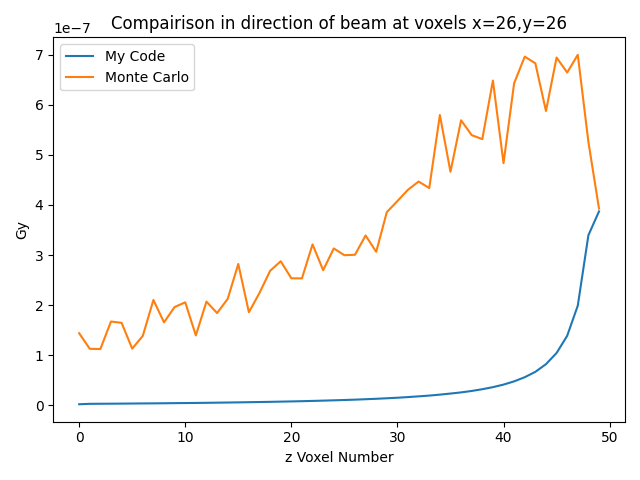

In [31]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

Text(0.5, 1.0, 'percent difference at x=25')

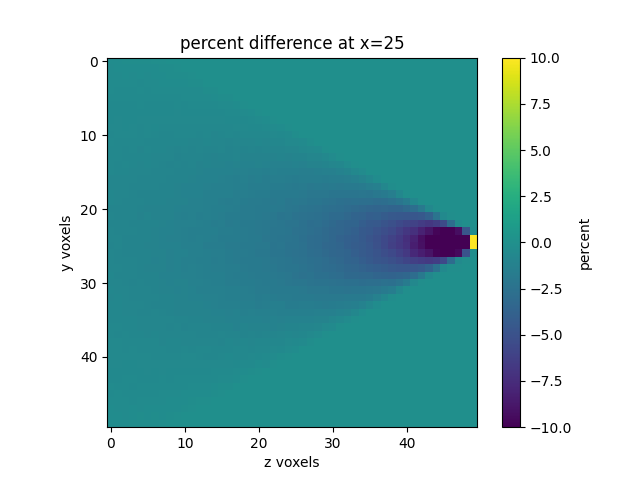

In [15]:
n=25
mini=-10
maxi=10

close(7);figure(7)
imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.mean(array(np.mean(mc_dose_array[n]),np.mean(my_dose_array[n]*conversion))),vmin=mini,vmax=maxi)
# imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.max([mc_dose_array,my_dose_array*conversion])*100,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(n))

## Testing Dose Five

In [61]:
my_dose_array = pickle.load(open('dose5_13.pickle','rb'))
# my_dose_array_2 = pickle.load(open('dose5_9.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose5.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [62]:
conversion = 1.602e-10*1.5

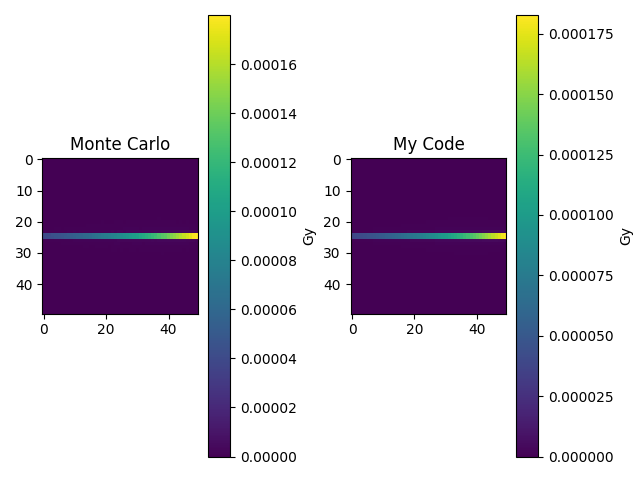

In [63]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


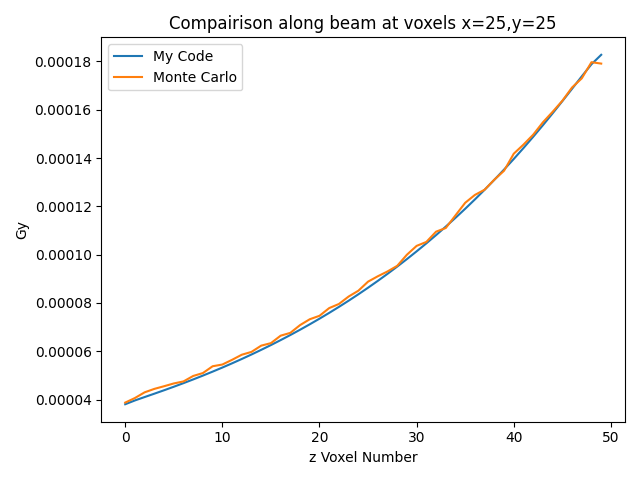

In [64]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code')
# plot(my_dose_array_2[25][25]*conversion,label='My Code 2')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

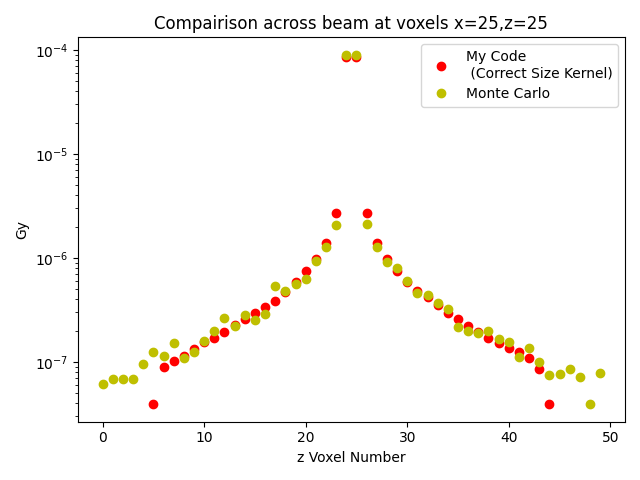

In [65]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code \n (Correct Size Kernel)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

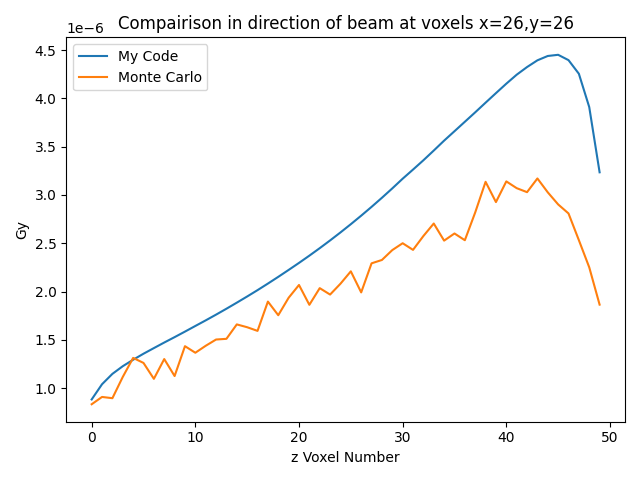

In [66]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

In [80]:
values = np.mean(abs(my_dose_array[24][24]/np.max(my_dose_array[24][24])-mc_dose_array[24][24]/np.max(mc_dose_array[24][24]))),np.mean(abs(my_dose_array[24][25]/np.max(my_dose_array[24][25])-mc_dose_array[24][25]/np.max(mc_dose_array[24][25]))),np.mean(abs(my_dose_array[25][24]/np.max(my_dose_array[25][24])-mc_dose_array[25][24]/np.max(mc_dose_array[25][24]))),np.mean(abs(my_dose_array[25][25]/np.max(my_dose_array[25][25])-mc_dose_array[25][25]/np.max(mc_dose_array[25][25])))

mean(values)

0.015220837705524577

In [81]:
values = np.max(abs(my_dose_array[24][24]/np.max(my_dose_array[24][24])-mc_dose_array[24][24]/np.max(mc_dose_array[24][24]))),np.max(abs(my_dose_array[24][25]/np.max(my_dose_array[24][25])-mc_dose_array[24][25]/np.max(mc_dose_array[24][25]))),np.max(abs(my_dose_array[25][24]/np.max(my_dose_array[25][24])-mc_dose_array[25][24]/np.max(mc_dose_array[25][24]))),np.max(abs(my_dose_array[25][25]/np.max(my_dose_array[25][25])-mc_dose_array[25][25]/np.max(mc_dose_array[25][25])))

np.max(values)

0.03149535768412737

## Testing Dose Six
This is a 120 keV monoenergetic pencil beam in an ellipse shape moving from positive to negative z and 30 degrees in positive y in water. The medium is a 5cm x 5cm x 5cm block with 50 voxels in each axis.

In [81]:
# my_dose_array_corrected = pickle.load(open('dose_19.pickle','rb'))
my_dose_array = pickle.load(open('dose6_1.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose6.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [82]:
conversion = 1.602e-10*0.0395

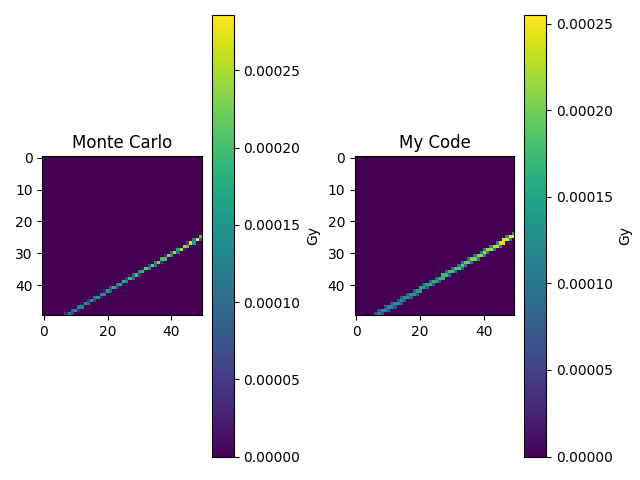

In [84]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


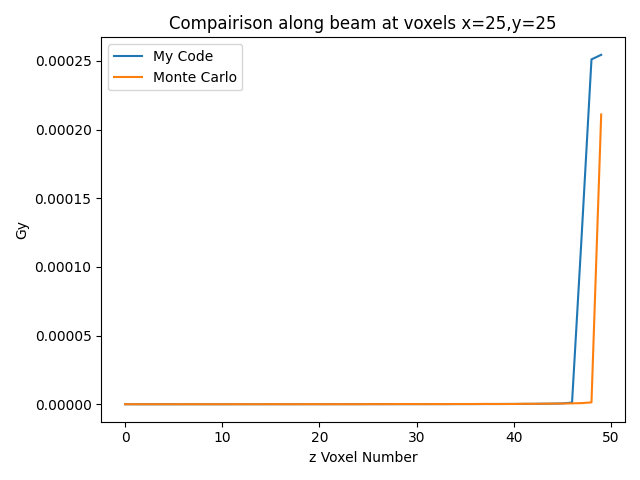

In [85]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[25][25],label='Monte Carlo')
# plot(pickle.load(open('dose_26.pickle','rb'))[25][25]*conversion,label='Uncorrected Centre')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

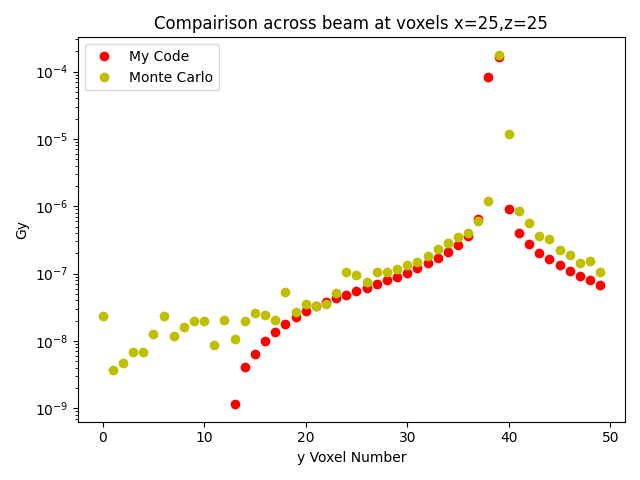

In [86]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code')
        # semilogy(n,pickle.load(open('dose_26.pickle','rb'))[25][n][25]*conversion,'go',label='My Code Uncorrected Centre')
        # semilogy(n,pickle.load(open('dose_21.pickle','rb'))[25][n][25]*conversion,'go',label='My Code \n (Kernel Interaction \n Size is 0.05cm)')
        # semilogy(n,pickle.load(open('dose_12.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Kernel Interaction \n Size is 0.1cm)')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Previous Incorrect \n Kernel Size)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        # semilogy(n,pickle.load(open('dose_26.pickle','rb'))[25][n][25]*conversion,'go')
        # semilogy(n,pickle.load(open('dose_21.pickle','rb'))[25][n][25]*conversion,'go')
        # semilogy(n,pickle.load(open('dose_12.pickle','rb'))[25][n][25]*conversion,'bo')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('y Voxel Number')
tight_layout()

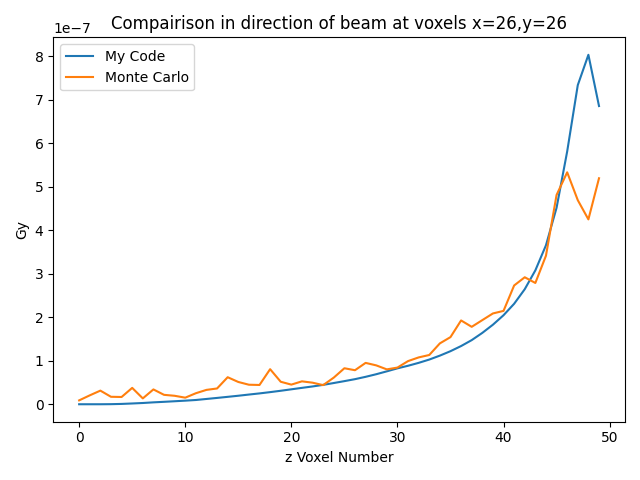

In [87]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[26][26]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

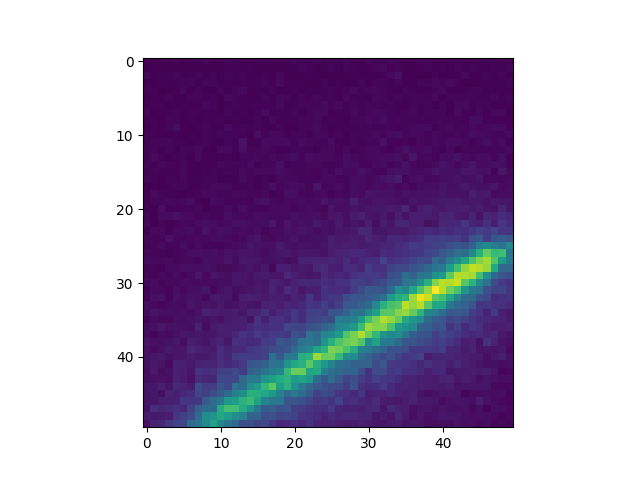

In [88]:
close(6);figure(6)
imshow(mc_dose_array[26])

Text(0.5, 1.0, 'percent difference at x=26')

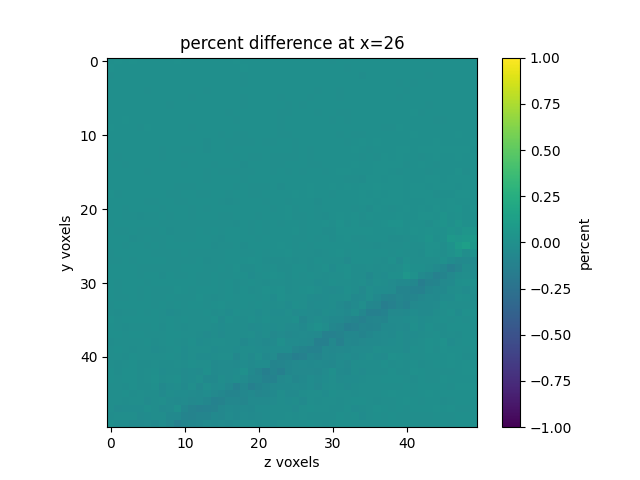

In [90]:
n=26
mini=-1
maxi=1

close(7);figure(7)
# imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.mean(array(np.mean(mc_dose_array[n]),np.mean(my_dose_array[n]*conversion))),vmin=mini,vmax=maxi)
imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.max([mc_dose_array,my_dose_array*conversion])*100,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(n))


## Testing Dose Seven

In [83]:
my_dose_array = pickle.load(open('dose7_6.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose7.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [84]:
conversion = 1.602e-10

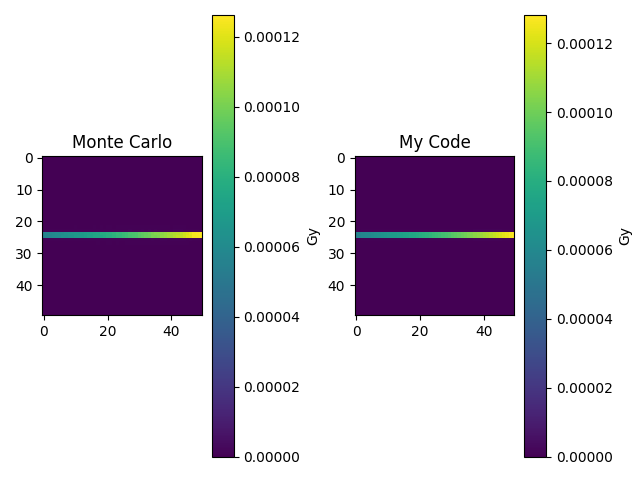

In [85]:
x = 25
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


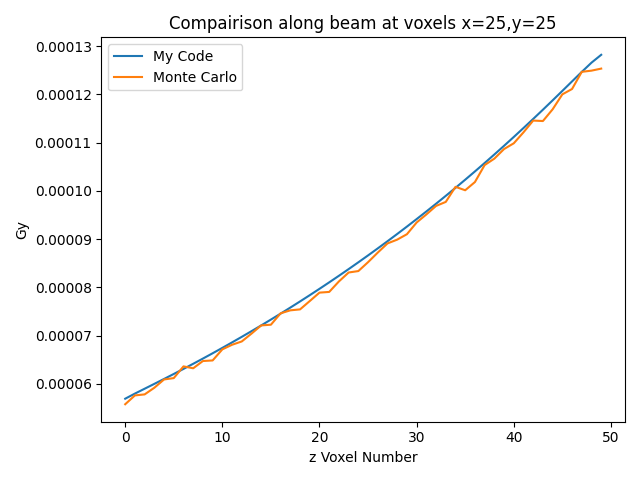

In [86]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

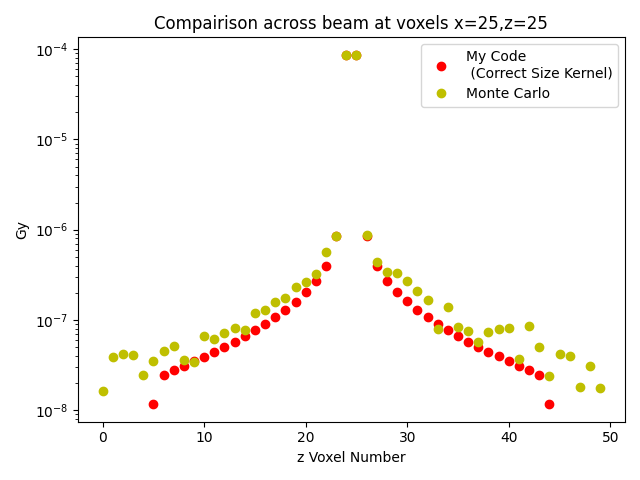

In [87]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code \n (Correct Size Kernel)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

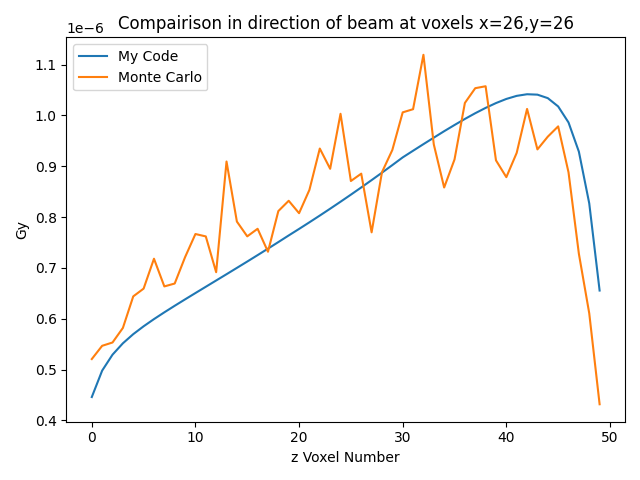

In [88]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

In [89]:
values = np.mean(abs(my_dose_array[24][24]/np.max(my_dose_array[24][24])-mc_dose_array[24][24]/np.max(mc_dose_array[24][24]))),np.mean(abs(my_dose_array[24][25]/np.max(my_dose_array[24][25])-mc_dose_array[24][25]/np.max(mc_dose_array[24][25]))),np.mean(abs(my_dose_array[25][24]/np.max(my_dose_array[25][24])-mc_dose_array[25][24]/np.max(mc_dose_array[25][24]))),np.mean(abs(my_dose_array[25][25]/np.max(my_dose_array[25][25])-mc_dose_array[25][25]/np.max(mc_dose_array[25][25])))

mean(values)

0.0061733483845595625

## Testing Dose Eight
- 5cm x 5cm x 5cm block of water 
- Same parameters as Testing Dose 4
- Fan Beam with 30 degree tilt in X

In [53]:
my_dose_array = pickle.load(open('dose8_1.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose8.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [54]:
conversion = 1.602e-10

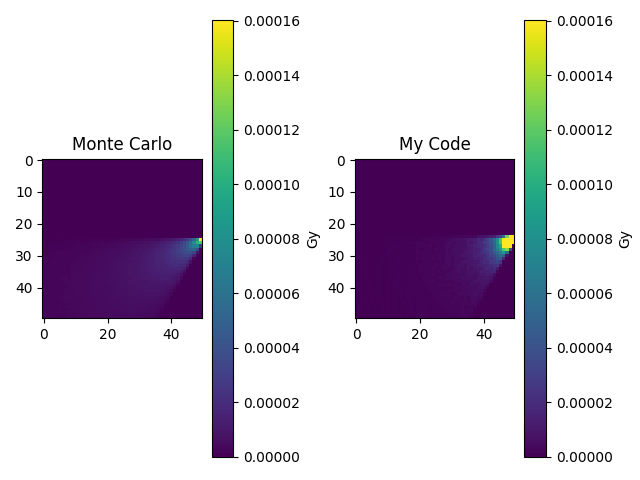

In [55]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


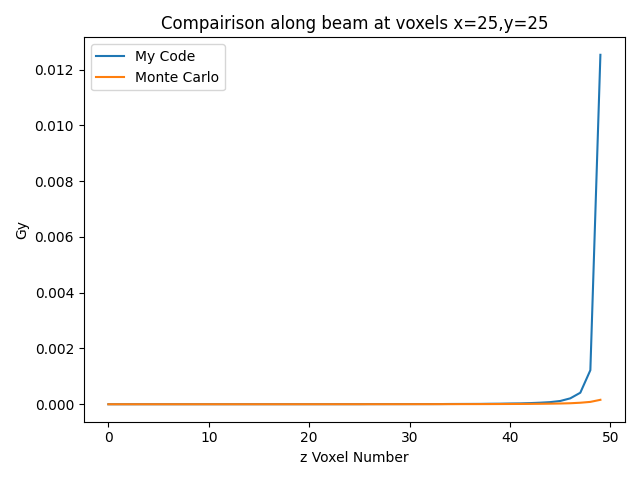

In [56]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

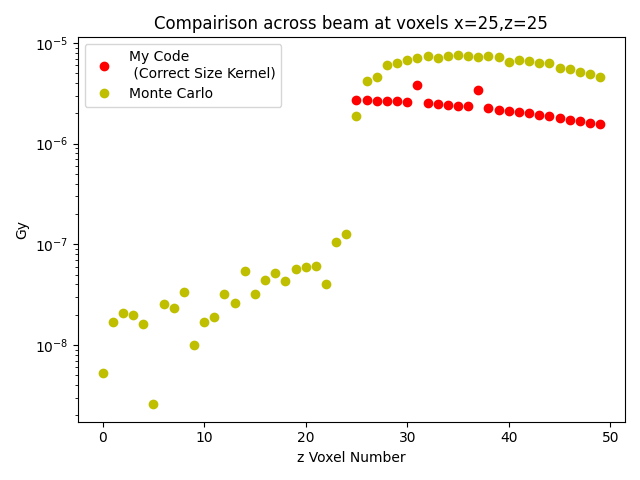

In [57]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code \n (Correct Size Kernel)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

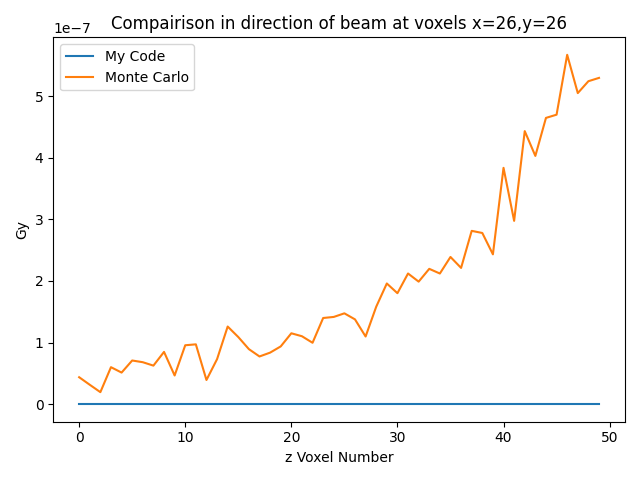

In [58]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

Text(0.5, 1.0, 'percent difference at x=25')

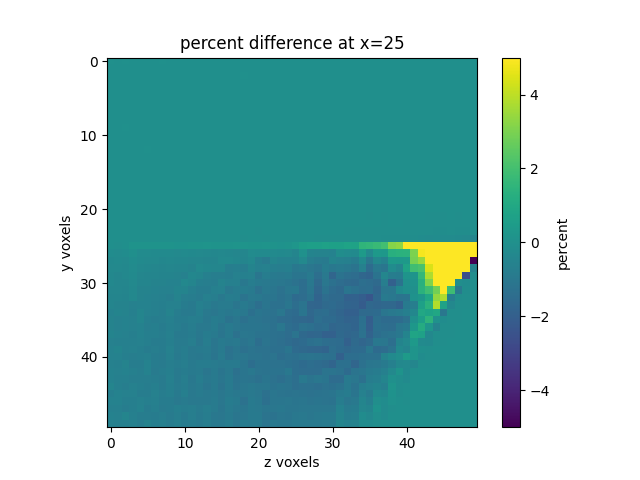

In [59]:
n=25
mini=-5
maxi=5

close(7);figure(7)
imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.mean(array(np.mean(mc_dose_array[n]),np.mean(my_dose_array[n]*conversion))),vmin=mini,vmax=maxi)
# imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.max([mc_dose_array,my_dose_array*conversion])*100,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(n))

## Testing Dose Nine

In [282]:
my_dose_array = pickle.load(open('dose9_1.pickle','rb'))
mc_dose_array_water_full = BinnedResult('../Topas/TestingDose9_Water.csv')
mc_dose_array_water = mc_dose_array_water_full.data['Sum']
mc_dose_array_bone_full = BinnedResult('../Topas/TestingDose9_Bone.csv')
mc_dose_array_bone = mc_dose_array_bone_full.data['Sum']
mc_dose_array_lung_full = BinnedResult('../Topas/TestingDose9_Lung.csv')
mc_dose_array_lung = mc_dose_array_lung_full.data['Sum']

mc_dose_array = []
mc_dose_array_stdev = []

for i in range(len(mc_dose_array_water)):
    mc_dose_array.append([])
    mc_dose_array_stdev.append([])
    for j in range(len(mc_dose_array_water[0])):
        mc_dose_array[i].append(list(mc_dose_array_lung[i][j]) + list(mc_dose_array_bone[i][j]) + list(mc_dose_array_water[i][j]))
        mc_dose_array_stdev[i].append(list(mc_dose_array_lung_full.data['Standard_Deviation'][i][j]) + list(mc_dose_array_bone_full.data['Standard_Deviation'][i][j]) + list(mc_dose_array_water_full.data['Standard_Deviation'][i][j]))

mc_dose_array = array(mc_dose_array)
mc_dose_array_stdev = array(mc_dose_array_stdev)

In [283]:
conversion = 1.602e-10

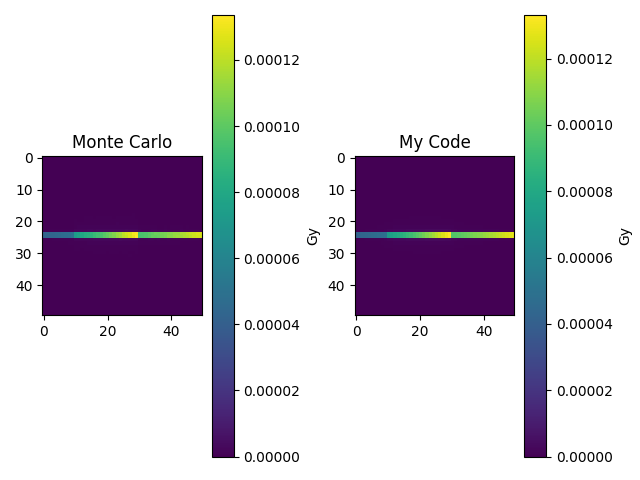

In [284]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


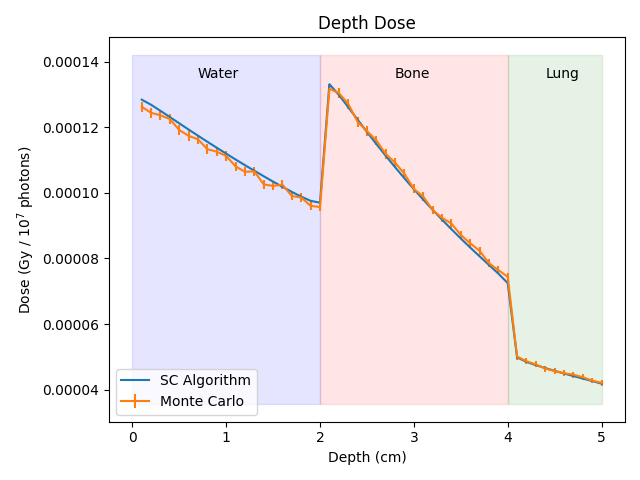

In [302]:
ifig=2;close(ifig);figure(ifig)
ax = axes()
plot(0.1*linspace(50,1,50),my_dose_array[25][25]*conversion,label='SC Algorithm')
# plot(mc_dose_array[25][25],label='Monte Carlo')

ax.add_patch(Rectangle((0, np.min(my_dose_array[25][25])*conversion*0.85), 2, np.max(my_dose_array[25][25])*conversion*0.8,alpha=0.1,color='blue'))
ax.add_patch(Rectangle((2, np.min(my_dose_array[25][25])*conversion*0.85), 2, np.max(my_dose_array[25][25])*conversion*0.8,alpha=0.1,color='red'))
ax.add_patch(Rectangle((4, np.min(my_dose_array[25][25])*conversion*0.85), 1, np.max(my_dose_array[25][25])*conversion*0.8,alpha=0.1,color='green'))

y_error = 1.96*mc_dose_array_stdev[25][25]*sqrt(10000000)
errorbar(0.1*linspace(50,1,50),mc_dose_array[25][25],yerr=y_error,label='Monte Carlo')
# plot([2,2],[np.min(my_dose_array[25][25])*conversion*0.9,np.max(my_dose_array[25][25])*conversion*1.05],color='gray',alpha=0.5)
# plot([4,4],[np.min(my_dose_array[25][25])*conversion*0.9,np.max(my_dose_array[25][25])*conversion*1.05],color='gray',alpha=0.5)
legend(loc='lower left')

title('Depth Dose')
ylabel('Dose (Gy / $10^7$ photons)')
xlabel('Depth (cm)')

annotate('Lung',(0.1*(49-5),0.000135))
annotate('Bone',(0.1*(49-21),0.000135))
annotate('Water',(0.1*(49-42),0.000135))
tight_layout()
savefig('CUMPC_Abstract_Figure.pdf')

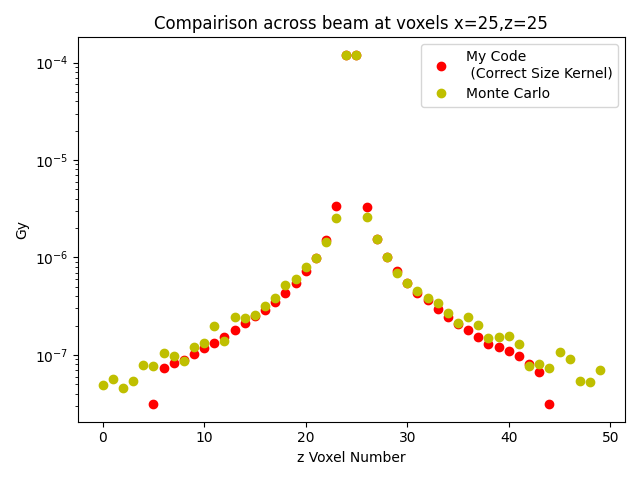

In [200]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code \n (Correct Size Kernel)')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Previous Incorrect \n Kernel Size)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

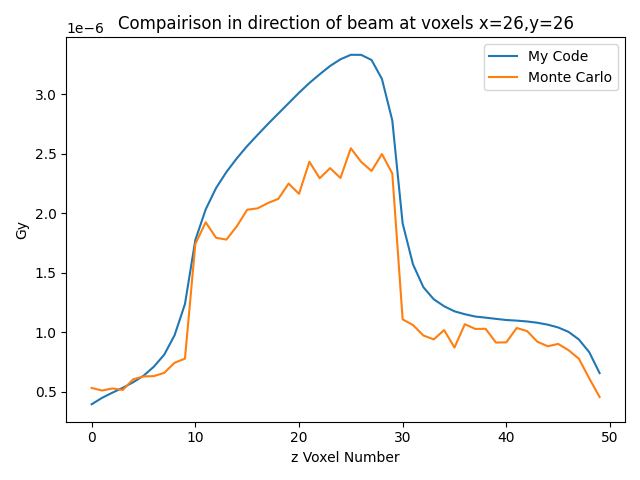

In [144]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

Text(0.5, 1.0, 'percent difference at x=25')

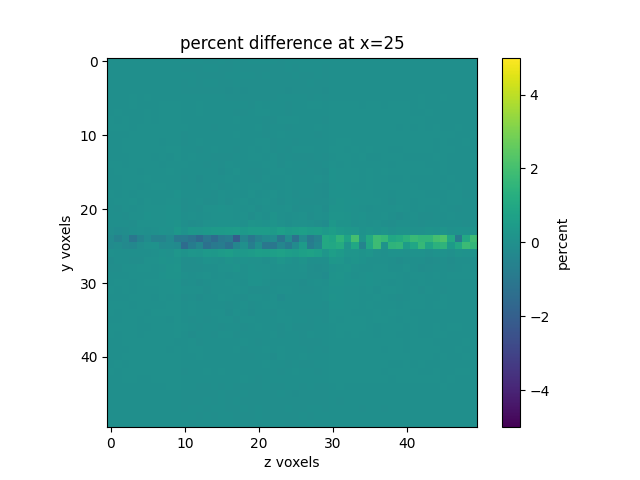

In [145]:
n=25
mini=-5
maxi=5

close(7);figure(7)
# imshow(100*(my_dose_array[n]*conversion-mc_dose_array[n])/np.mean(array(np.mean(mc_dose_array[n]),np.mean(my_dose_array[n]*conversion))),vmin=mini,vmax=maxi)
imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.max([mc_dose_array,my_dose_array*conversion])*100,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(n))

In [146]:
values = np.mean(abs(my_dose_array[24][24]/np.max(my_dose_array[24][24])-mc_dose_array[24][24]/np.max(mc_dose_array[24][24]))),np.mean(abs(my_dose_array[24][25]/np.max(my_dose_array[24][25])-mc_dose_array[24][25]/np.max(mc_dose_array[24][25]))),np.mean(abs(my_dose_array[25][24]/np.max(my_dose_array[25][24])-mc_dose_array[25][24]/np.max(mc_dose_array[25][24]))),np.mean(abs(my_dose_array[25][25]/np.max(my_dose_array[25][25])-mc_dose_array[25][25]/np.max(mc_dose_array[25][25])))

mean(values)

0.009280226259729882

In [147]:
values = np.max(abs(my_dose_array[24][24]/np.max(my_dose_array[24][24])-mc_dose_array[24][24]/np.max(mc_dose_array[24][24]))),np.max(abs(my_dose_array[24][25]/np.max(my_dose_array[24][25])-mc_dose_array[24][25]/np.max(mc_dose_array[24][25]))),np.max(abs(my_dose_array[25][24]/np.max(my_dose_array[25][24])-mc_dose_array[25][24]/np.max(mc_dose_array[25][24]))),np.max(abs(my_dose_array[25][25]/np.max(my_dose_array[25][25])-mc_dose_array[25][25]/np.max(mc_dose_array[25][25])))

np.max(values)

0.03473927618026118

## Lung Patient

In [1]:
%pylab ipympl
import pickle
import imshow_slider as ims
from topas2numpy import BinnedResult
from coorform import coorform

Populating the interactive namespace from numpy and matplotlib


(array([126]), array([101]), array([92]))

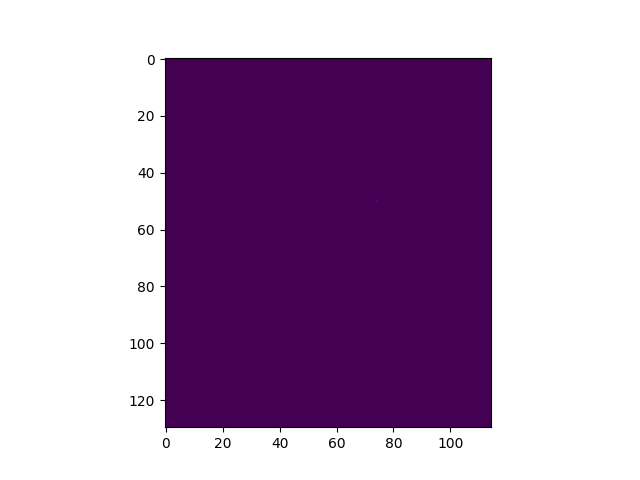

In [88]:
# close(1);figure(1)
# imshow(mc_dose_array[126])
ims.slider(mc_dose_array)
where(mc_dose_array == np.max(mc_dose_array))
# unique(where(my_dose_array != 0)[0])

In [53]:
my_dose_array = pickle.load(open('lungpatient_2.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/lung_patient/Lung_Patient_Dose.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [54]:
conversion = 1.602e-10*0.05

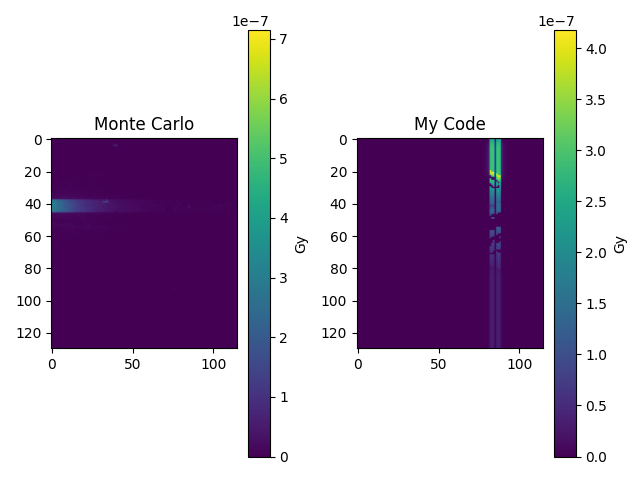

In [55]:
x = 107
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0)
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0)
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:>,
 <mpl_interactions.controller.Controls at 0x7f567cd93710>)

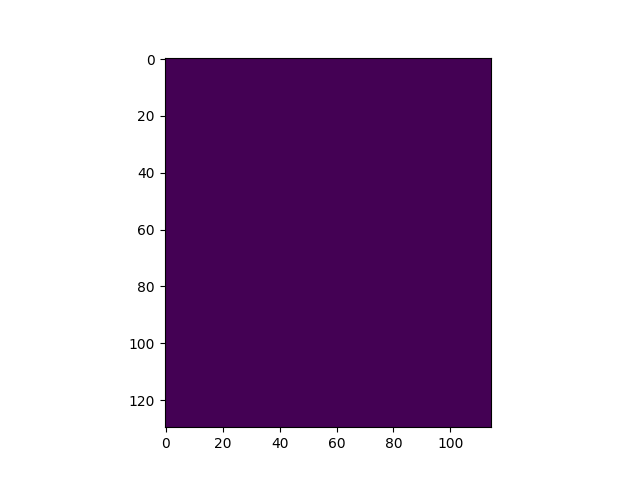

In [47]:
myArray = []
fo = open("lung_patient_python/lung_materials.egsphant", "r")
for line in fo:
    for nbr in line.split():
        for n in nbr:
            myArray.append(int(n))
materials = reshape(myArray[:],[228,130,115],order='f').T
materials = array(materials,dtype=int)-1
materials = coorform('z',materials)
# ifig=1;close(ifig);figure(ifig)
ims.slider(materials)

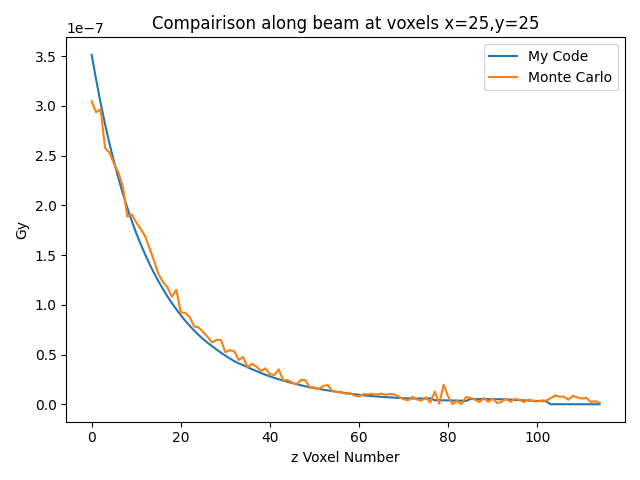

In [48]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[107][41]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[107][41],label='Monte Carlo')
# plot(pickle.load(open('dose_26.pickle','rb'))[25][25]*conversion,label='Uncorrected Centre')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


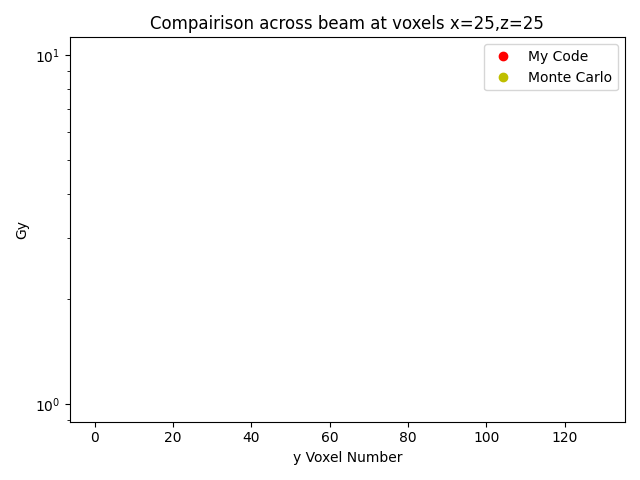

In [49]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code')
        # semilogy(n,pickle.load(open('dose_26.pickle','rb'))[25][n][25]*conversion,'go',label='My Code Uncorrected Centre')
        # semilogy(n,pickle.load(open('dose_21.pickle','rb'))[25][n][25]*conversion,'go',label='My Code \n (Kernel Interaction \n Size is 0.05cm)')
        # semilogy(n,pickle.load(open('dose_12.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Kernel Interaction \n Size is 0.1cm)')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Previous Incorrect \n Kernel Size)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        # semilogy(n,pickle.load(open('dose_26.pickle','rb'))[25][n][25]*conversion,'go')
        # semilogy(n,pickle.load(open('dose_21.pickle','rb'))[25][n][25]*conversion,'go')
        # semilogy(n,pickle.load(open('dose_12.pickle','rb'))[25][n][25]*conversion,'bo')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('y Voxel Number')
tight_layout()

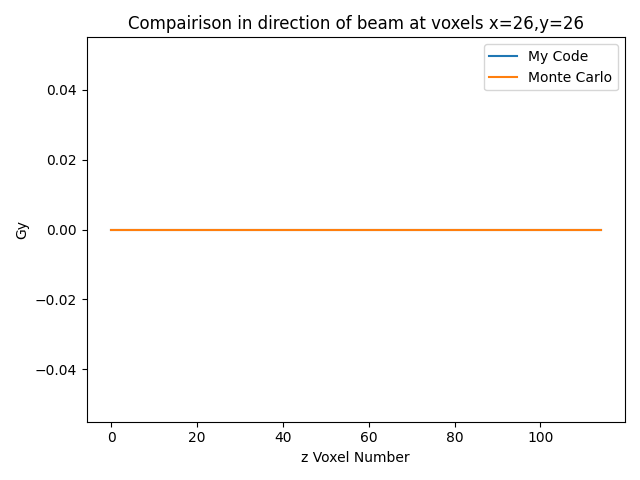

In [50]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[26][26]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

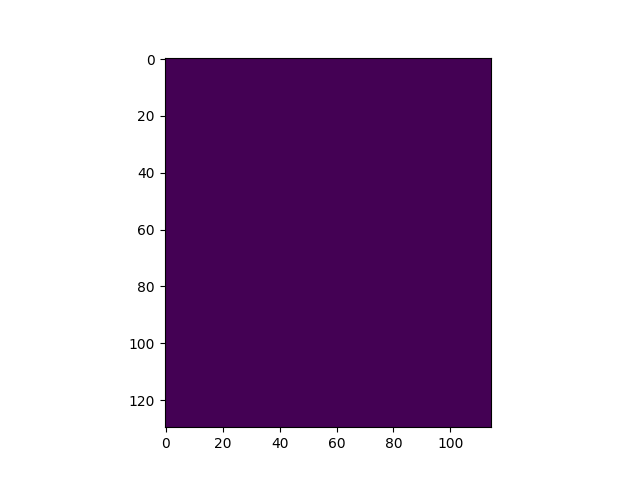

In [51]:
close(6);figure(6)
imshow(my_dose_array[26])

Text(0.5, 1.0, 'percent difference at x=107')

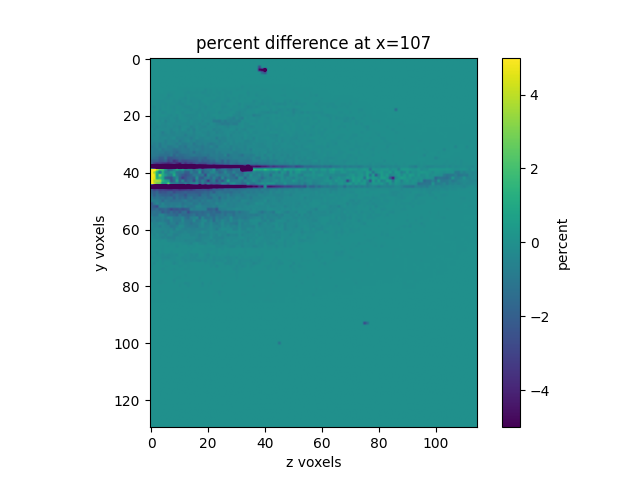

In [52]:
n=107
mini=-5
maxi=5

close(7);figure(7)
# imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.mean(array(np.mean(mc_dose_array[n]),np.mean(my_dose_array[n]*conversion))),vmin=mini,vmax=maxi)
imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.max([mc_dose_array,my_dose_array*conversion])*100,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(n))

# np.max([mc_dose_array[n],my_dose_array[n]*conversion])
